# Exercise 8: Coding and visualizing geostatistics (17 points)

The exercise this week will allow you to gain some experience with basic geostatistics by creating some Python functions for performing common statistical calculations and analyzing data from the [Smithsonian Institution's Global Volcanism Program](https://volcano.si.edu/).

One of the goals of this part of the course is to develop your quantitative geoscience skills, including learning how to convert mathematical equations to Python code. Doing this allows you to explore how various equations work and produce useful data plots or predictions, something increasingly done by geoscience professionals.

You'll use functions to calculate some statistics related to Holocene volcanoes from the [Smithsonian Institution's Global Volcanism Program](https://volcano.si.edu/).

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Properly converting the given formulas to Python functions and saving them in the Python script file `gdam_functions.py`
    - **Note**: You should not use existing Python, Pandas or NumPy functions in the functions you create, other than perhaps a function for calculating the square root
- Including comments that explain what most lines in the code do
- Uploading your notebook and script file to your GitHub repository for this week's exercise

## Problem 1: Analyzing volcano data (8 points)

In this problem we'll utilize the functions generated in Problem 1 to calculate some statistics related to Holocene volcanoes from the [Smithsonian Institution's Global Volcanism Program](https://volcano.si.edu/).

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Reading and processing the [data file](data/GVP_Volcano_List_Holocene.csv)
- Cleaning the raw data as instructed
- Creating a new DataFrame of regional volcano statistics
- Including comments that explain what most lines in the code do
- Answering a couple questions at the end of the problem
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 1: Reading the data file (1.5 points)

The first step in this exercise is to read in the [data file](data/GVP_Volcano_List_Holocene.csv) we're using. 

- For this, you should use the pandas `read_csv()` funtion to read in the data file [data/GVP_Volcano_List_Holocene.csv](data/GVP_Volcano_List_Holocene.csv) to the variable `data`
    - Use the semicolon character `;` as the separator between columns
    - Skip the first row

In [1]:
data = None
fp = r"GVP_Volcano_List_Holocene.csv"

#import pandas library and Holocene volcanoes data file
import pandas as pd
data = pd.read_csv(fp, 
                   sep = ";", 
                   skiprows = 1)

In [2]:
# This test print should print the head and the column names
print(data.head(1))
print(data.columns)


   Volcano Number               Volcano Name  Country Primary Volcano Type   
0          210010  West Eifel Volcanic Field  Germany              Maar(s)  \

  Activity Evidence Last Known Eruption                          Region   
0    Eruption Dated            8300 BCE  Mediterranean and Western Asia  \

        Subregion  Latitude  Longitude  Elevation (m) Dominant Rock Type   
0  Western Europe     50.17       6.85            600            Foidite  \

                         Tectonic Setting  
0  Rift zone / Continental crust (>25 km)  
Index(['Volcano Number', 'Volcano Name', 'Country', 'Primary Volcano Type',
       'Activity Evidence', 'Last Known Eruption', 'Region', 'Subregion',
       'Latitude', 'Longitude', 'Elevation (m)', 'Dominant Rock Type',
       'Tectonic Setting'],
      dtype='object')


In [3]:
# This test print should print the first row of data
print(data.loc[0].values)


[210010 'West Eifel Volcanic Field' 'Germany' 'Maar(s)' 'Eruption Dated'
 '8300 BCE' 'Mediterranean and Western Asia' 'Western Europe' 50.17 6.85
 600 'Foidite' 'Rift zone / Continental crust (>25 km)']


In [4]:
# This test print should print the number of rows of data
print(f"The DataFrame contains {len(data)} rows.")


The DataFrame contains 1426 rows.


### Part 2: Preparing the data (1 point)

Before moving to using our statistical functions, we need to clean up our data a bit.

- Create a subset of the `data` dataframe called `clean_data` that contains only volcanoes with elevations at and above sea level
- Drop rows from the `clean_data` DataFrame with NaNs in the 'Tectonic Setting' column

In [5]:
#creates data subset of volcanoes with elevations at and above sea level
clean_data = data.loc[data['Elevation (m)'] >= 0]

#removes rows with NaN values in the 'Tectonic Setting' column
clean_data = clean_data.dropna(subset = "Tectonic Setting")

In [6]:
# This test print should print the head
print(clean_data.head(1))


   Volcano Number               Volcano Name  Country Primary Volcano Type   
0          210010  West Eifel Volcanic Field  Germany              Maar(s)  \

  Activity Evidence Last Known Eruption                          Region   
0    Eruption Dated            8300 BCE  Mediterranean and Western Asia  \

        Subregion  Latitude  Longitude  Elevation (m) Dominant Rock Type   
0  Western Europe     50.17       6.85            600            Foidite  \

                         Tectonic Setting  
0  Rift zone / Continental crust (>25 km)  


In [7]:
# This test print should print the last 5 tectonic settings
print(clean_data["Tectonic Setting"].tail(5))


1420    Subduction zone / Oceanic crust (< 15 km)
1421    Subduction zone / Oceanic crust (< 15 km)
1422    Subduction zone / Oceanic crust (< 15 km)
1424      Intraplate / Continental crust (>25 km)
1425      Intraplate / Continental crust (>25 km)
Name: Tectonic Setting, dtype: object


### Part 3: Global volcano statistics (1 point)

With our clean data, we can now calculate some global statistical values for Holocene volcanoes.

- Calculate the mean elevation of all volcanoes in the `clean_data` DataFrame as variable `global_mean`
- Calculate the standard deviation in the elevation of all the volcanoes in the `clean_data` DataFrame as variable `global_stddev`
- Calculate the standard error in the elevation of all the volcanoes in the `clean_data` DataFrame as variable `global_stderr`

**Note**: You will need to use the `.values` attribute with the elevation data to calculate the requested values using the functions you created in Problem 1.

In [8]:
import numpy as np

#puts the elevation data into a new variable
elevation = clean_data['Elevation (m)']

#calculates mean, standard deviation, and standard error of the Holocene volcano elevations, respectively
global_mean = elevation.mean()
global_stddev = elevation.std()
global_stderr = elevation.sem(ddof = 0)

In [9]:
# This should print the global mean volcano elevation
print(f"My global average volcano elevation is {global_mean} meters.")
print("The expected value is approximately 1922 meters.")


My global average volcano elevation is 1922.0274599542333 meters.
The expected value is approximately 1922 meters.


In [10]:
# This should print the global standard deviation in volcano elevation
print(f"My global standard deviation in volcano elevation is {global_stddev} meters.")
print("The expected value is approximately 1406 meters.")


My global standard deviation in volcano elevation is 1406.3862078595585 meters.
The expected value is approximately 1406 meters.


In [11]:
# This should print the global standard deviation in volcano elevation
print(f"My global standard error in volcano elevation is {global_stderr} meters.")
print("The expected value is approximately 39 meters.")


My global standard error in volcano elevation is 38.82733250071733 meters.
The expected value is approximately 39 meters.


### Part 4: Compiling regional volcano statistics (2 points)

Using an approach similar to that in Part 3, we can now calculate some statistics on volcanoes in various geographic regions.

- Create a variable `regions` that contains the unique 'Region' values from the `clean_data` DataFrame
- Using a `for` loop, loop over each region and append its mean, standard deviation, and standard error in volcano elevation to the empty list variables `means`, `stddevs`, and `stderrs`
    - **Note**: In your `for` loop you should first extract a subset of data using `.loc` to select the elevation values for the region of interest
    - You will also want to convert your subset of elevations to an array of values using the `.values` attribute before using your functions

In [12]:
means = []
stddevs = []
stderrs = []

#shows the unique values in the 'Region' column
regions = clean_data['Region'].unique()

#computes mean, standard deviation, and standard error for every region and appends values to empty variables above 
for region in regions:
    mean = clean_data.loc[clean_data['Region'] == region, ['Elevation (m)']]['Elevation (m)'].mean()
    means.append(mean)
    
    std_dev = clean_data.loc[clean_data['Region'] == region, ['Elevation (m)']]['Elevation (m)'].std()
    stddevs.append(std_dev)
    
    std_err = clean_data.loc[clean_data['Region'] == region, ['Elevation (m)']]['Elevation (m)'].sem(ddof=0)
    stderrs.append(std_err)

In [13]:
# This should print the last value in the regions array
print(f"The last region is {regions[-1]}.")


The last region is Antarctica.


In [14]:
# This should print the last value in the means list
print(f"The last mean value is {means[-1]} meters.")


The last mean value is 1670.0967741935483 meters.


In [15]:
# This should print the last value in the stddevs list
print(f"The last stddev value is {stddevs[-1]} meters.")


The last stddev value is 1229.1619734555927 meters.


In [16]:
# This should print the last value in the stderrs list
print(f"The last stderr value is {stderrs[-1]} meters.")


The last stderr value is 217.17410957715947 meters.


### Part 5: Creating a regional DataFrame (1.5 points)

The last step in this problem is to combine our new lists into a new Pandas DataFrame.

- Create a new DataFrame called `region_data` using `regions` as the index and the `means`, `stddevs`, and `stderrs` lists as the column data
    - **Hint**: When creating a DataFrame, column data can be specified in a dictionary using the `data` keyword (e.g., `data = {'Column heading': column_values}`), where `'Column heading'` would be the name of the column, and `column_values` would be the data in that column
    - **Hint**: The `index` parameter can be used to indicate the values to be used for the index

In [17]:
region_data = None

#creates new DataFrame with means, standard deviation, and standard error as columns and regions as index
region_data = pd.DataFrame({'Mean elevation':means, 
                            'Standard deviation':stddevs, 
                            'Standard error':stderrs}, 
                           index = regions)

region_data

,Mean elevation,Standard deviation,Standard error
Mediterranean and Western Asia,1936.052632,1529.455917,244.824135
Africa and Red Sea,1689.950413,951.039071,86.100091
Middle East and Indian Ocean,1806.302326,1266.901254,190.940896
New Zealand to Fiji,759.250000,681.014187,118.491454
Melanesia and Australia,951.298507,650.871211,78.920936
Indonesia,1814.984127,871.487473,77.329573
Philippines and SE Asia,1432.816327,755.926134,106.881834
"Japan, Taiwan, Marianas",1266.542857,836.786712,81.272224
Kuril Islands,1103.279070,447.914444,67.507381
Kamchatka and Mainland Asia,1765.291339,912.706355,80.670106


In [18]:
# This should print the last row in the region_data DataFrame
print(region_data.tail(1))


            Mean elevation  Standard deviation  Standard error
Antarctica     1670.096774         1229.161973       217.17411


In [19]:
# This should print the shape of the DataFrame
print(f"DataFrame dimensions: {region_data.shape}")


DataFrame dimensions: (19, 3)


In [20]:
# This should print mean elevation for Alaska
print(f"Alaska mean volcano elevation: {region_data['Mean elevation'].loc['Alaska']} meters.")


Alaska mean volcano elevation: 1500.4827586206898 meters.


In [21]:
### Part 6: Questions for Problem 2 (1 point)

1. How much do the standard deviation values vary among the regions? What do these values tell you about the volcano elevations in different regions?
2. Do you observe a large difference between the standard deviation and standard error values? Is it clear why you should always indicate whether reported values are standard deviations or standard errors?

Object `errors` not found.


Type:        ndarray
String form:
['Mediterranean and Western Asia' 'Africa and Red Sea'
           'Middle East and Indian Ocean' 'New Zeala <...> America' 'South America' 'West Indies'
           'Iceland and Arctic Ocean' 'Atlantic Ocean' 'Antarctica']
Length:      19
File:        /srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy

1. The standard deviation values vary greatly, which can go as low as 271 in the West Indies region to about 1552 in Hawaii and Pacific Ocean region. These tell us that the volcano elevations in different regions vary greatly from each other.
2. Yes, there is a large difference between the standard error and standard deviation. With that, it is clear that we should always indicate which measure of variability we are reporting because the former reports how scattered the data is, while the latter indicates the uncertainty of the mean estimate.


## Problem 2: Visualizing uncertainty (9 points)

In this problem we will continue to develop our Python mathematical and plotting skills by visualizing the regional volcano data using bar plots and the *normal distribution*. The normal distribution is a mathematical function with a bell shape, also known as the *Gauss function* or *Gaussian*. This function is centered on the mean value of a given set of values, where its value is greatest, and its value decreases away from the mean in what is hopefully a familiar form.

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Creating bar plots of the regional volcano data
- Properly defining a function for calulating normal distributions
- Creating a new DataFrame of regional volcano elevation distributions
- Including comments that explain what most lines in the code do
- Answering a couple questions at the end of the problem
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 1: A bar plot of our regional volcano data (*1.5 points*)

We'll start visualizing our volcano data by creating a bar plot of the mean elevations along with their standard deviations.

- Create a bar plot of the mean elevations in the `region_data` DataFrame, including the standard deviation in elevation as an error bar
    - The data for the error bars can be assigned using the `yerr` parameter in the `.plot()` function
    - We suggest you use a slightly larger figure size of 12 by 8 inches, which can be set using the `figsize` parameter in the `.plot()` function
- Include a title and label on the y-axis
- Also add a black, dashed line spanning the width of the plot and indicating the global mean volcano elevation
    - Check the hints for this week's exercise about how to add this line
- Be sure to show a plot legend
- Finally, add a figure caption in the Markdown cell below the Python cell for your plot that describes the plot as if it were in a scientific journal article

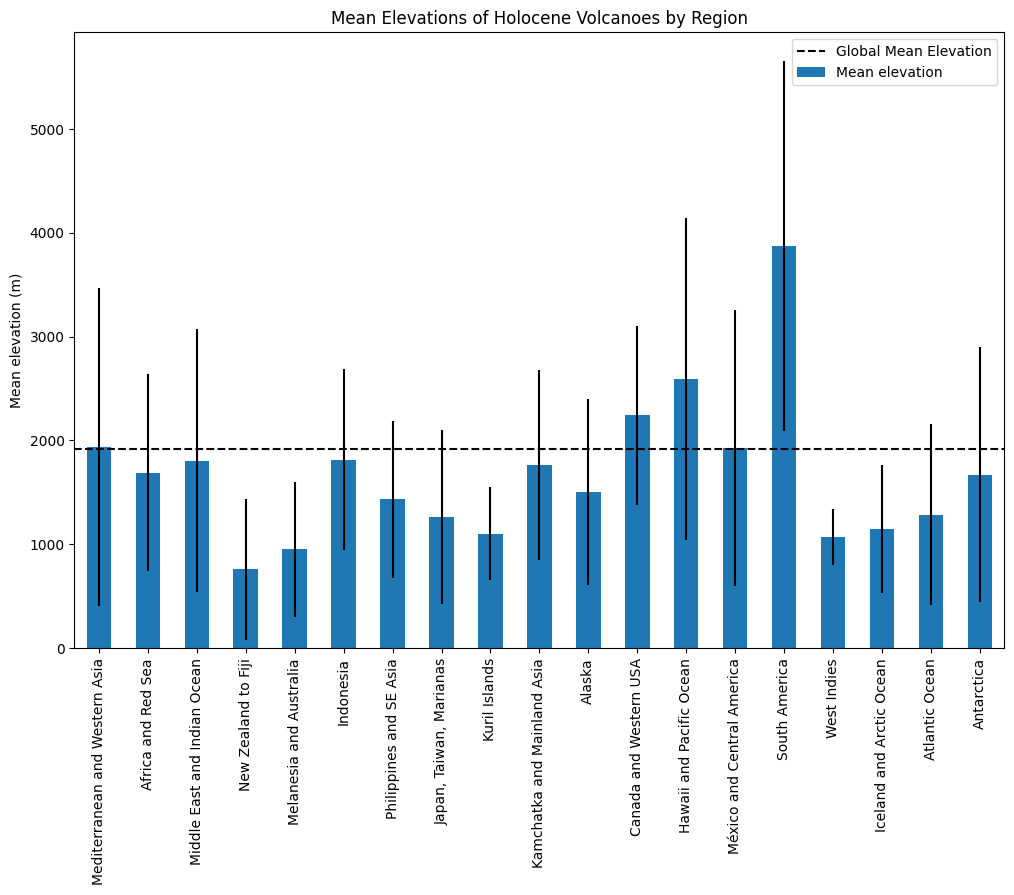

In [22]:
ax = None

import matplotlib.pyplot as plt

#sets the figure size
plt.figure(figsize = (12,8))

#creates a bar plot with error bar using standard deviation
ax = region_data['Mean elevation'].plot(kind = 'bar', yerr = region_data['Standard deviation'])

#indicates global mean elevation with a horizontal dashed line
plt.axhline(y = global_mean, color = 'black', linestyle = '--', label = 'Global Mean Elevation')

#adds other graph elements
plt.title('Mean Elevations of Holocene Volcanoes by Region')
plt.ylabel('Mean elevation (m)')
plt.legend()

#shows the bar graph
plt.show() 

Figure 1. Figure 1 shows the bar graph of the mean elevations of Holocene volcanoes in different regions. Their standard deviations are also indicated by a vertical error bar. The global mean Holocene volcano elevation is also shown with a horizontal dashed line. Based on the data, South America has the highest mean elevation and standard deviation.

### Part 1: One more statistical function (2 points)

Your next task in this problem is to define the functions that will be needed to make plots of the normal distributions of the data from Problem 2.
We can start with the Gaussian function itself, which has a mathematical definition that is
\begin{equation}
  \Large
  G_{\bar{x}, \sigma_{x}}(x) = \frac{1}{\sigma_{x} \sqrt{2 \pi}} e^{-(x - \bar{x})^{2} / 2 \sigma_{x}^{2})}
\end{equation}

*Equation 4. The normal distribution*.

In this equation, $e$ is the exponential function, $x$ is the value for which the normal distribution is calculated (elevation in our case), $\bar{x}$ is the mean, and $\sigma_{x}$ is the standard deviation.
As we have already defined functions for the mean and standard deviation, you can use your earlier functions here.
**Note**: With the Gaussian function we are explicitly assuming here that the uncertainty is symmetric and follows a bell-shaped distribution about the mean.

For this part you should:

- Add NumPy to the list of modules to import at the start of the `gdam_functions.py` file in order to be able to use the exponential function and one for calculating the square root
- Define a new function called `gaussian()` in the `gdam_functions.py` file, which you can use to calculate the normal distribution.
    - **Note**: You will have more than one parameter when defining this function.
- Use your function in the cell below to calculate the Gaussian value for the specified input parameter values.

In [23]:
# Use your gaussian function below to calculate the value for a mean of 2.0, std dev of 1.0, and at x = 1.0
from gdam_functions import gaussian

gauss_mean = 2.0
gauss_stddev = 1.0
gauss_x = [1.0]
test_gauss = None

test_gauss = gaussian(gauss_mean, gauss_stddev, gauss_x)

In [24]:
# Import the new gaussian function along with the old ones
from gdam_functions import gaussian

# This test should also work
print(f"The Gaussian value for this test should be 0.3989. My Gaussian value is: {gaussian(1, 1,[1])[0]}.")


The Gaussian value for this test should be 0.3989. My Gaussian value is: 0.3989422804014327.


In [25]:
# This test should work
print(f"The Gaussian value for this test should be 0.1994. My Gaussian value is: {gaussian(2, 2, [2])[0]}.")


The Gaussian value for this test should be 0.1994. My Gaussian value is: 0.19947114020071635.


### Part 4: Calculating normal distributions for our elevation data (1 point)

Your next task now that we have the functions defined is to calculate the normal distributions for each of the regional volcano elevations from Problem 2. You can use the mean and standard deviation values calculated in the `region_data` DataFrame for this.

- Define a NumPy array called `elevations` that goes from 0 to 8000 meters in 1001 steps
- Create a new empty Pandas DataFrame called `gaussians` with `elevations` as the index
- Use a `for` loop to loop over each region in the `regions` array defined back in Problem 2
    - For each region, calculate the normal distribution of volcano elevations using the regional mean elevation and standard deviation in elevation over the range of elevations in the `elevations` array
    - Save each normal distribution in a new column named for the region
        - As you may recall, you can easily add a new column by assigning values to a new column name in the DataFrame. For example, `df['New column'] = elevations` would assign the values from the `elevations` array to a new column in the DataFrame `df` called `'New column'`

In [26]:
# Array of elevations
elevations = None

# New DataFrame for normal distributions
gaussians = None

elevations = np.linspace(0, 8000, 1001)

gaussians = pd.DataFrame(index = elevations)

r_means = []
r_stddev = []
r_distribution = []

for index, x in region_data.iterrows():
    region_mean = x['Mean elevation']
    r_means.append(region_mean)
    region_stddev = x['Standard deviation']
    r_stddev.append(region_stddev)
    region_distribution = gaussian(region_mean, region_stddev, elevations)
    r_distribution.append(region_distribution)
    gaussians[index] = region_distribution
    
gaussians.columns = region_data.index

print(gaussians)

        Mediterranean and Western Asia  Africa and Red Sea   
0.0                       1.170644e-04        8.650813e-05  \
8.0                       1.178405e-04        8.780781e-05   
16.0                      1.186184e-04        8.912071e-05   
24.0                      1.193982e-04        9.044684e-05   
32.0                      1.201799e-04        9.178621e-05   
...                                ...                 ...   
7968.0                    1.093634e-07        1.446058e-13   
7976.0                    1.071291e-07        1.367901e-13   
7984.0                    1.049374e-07        1.293876e-13   
7992.0                    1.027879e-07        1.223771e-13   
8000.0                    1.006796e-07        1.157382e-13   

        Middle East and Indian Ocean  New Zealand to Fiji   
0.0                     1.139593e-04         3.146650e-04  \
8.0                     1.149876e-04         3.187912e-04   
16.0                    1.160206e-04         3.229270e-04   
24.0       

In [27]:
# This test print should work
print(f"The elevation at index 400 is {elevations[400]}. The expected value is 3200.0.")


The elevation at index 400 is 3200.0. The expected value is 3200.0.


In [28]:
# This should print the shape of the DataFrame
print(f"DataFrame dimensions: {gaussians.shape}")


DataFrame dimensions: (1001, 19)


### Part 5: Plotting our volcano data, version 2.0 (2 points)

Finally, we can plot our normal distributions.

- Create a plot of the data in the `gaussians` DataFrame using the Pandas `.plot()` function
    - Include a title and again we suggest a figure size of 12 by 8 inches
- Label the x- and y-axes
    - The y-axis label should be 'Probability'
- Set the range for the y-axis to go from 0.0 to 0.0016
- Finally, add a figure caption in the Markdown cell below the Python cell for your plot that describes the plot as if it were in a scientific journal article

<Figure size 1200x800 with 0 Axes>

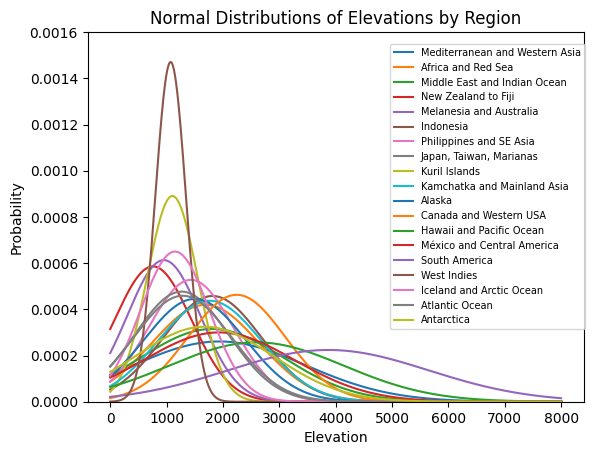

In [29]:
ax = None

#sets the figure size
plt.figure(figsize = (12,8))

#creates the plot of the normal distributions
ax = gaussians.plot(ax = ax)

#adds other graph elements
plt.title('Normal Distributions of Elevations by Region')
plt.xlabel('Elevation')
plt.ylabel('Probability')
plt.ylim(0.0, 0.0016)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.1, 1.1), prop= {'size': 7}, borderaxespad= 5)

#shows the graph of the normal distributions
plt.show() 

Figure 2. The figure presents the normal distributions of the elevations of Holocene volcanoes in different regions. Each region is represented by a different colored curve. Indonesia has the steepest curve, indicating that the Holocene volcanoes in the said region have the smallest variation in elevation.

### Part 6: Questions for Problem 3 (1 point)

1. How does the shape of the Gaussian distribution change for different values of the standard deviation?
2. Using this method of visualization, is it clear which regions have larger or smaller variations in average volcano elevation?

1. The shape of the Gaussian distribution becomes narrower and  taller as the standard deviation becomes smaller. It becomes wider and shorter when the standard deviation becomes larger.
2. Yes, it is clear which regions have larger and smaller variations in average volcano elevation.